# 1. Numpy, matplotlib, pandas - histogramy

Stručná otázka toho, jak s histogramy pracují tři kanonické knihovny pro numerické počítání / analýzu dat v Pythonu.
Omezíme se na jednorozměrné příklady, mějme však na paměti, že existují i funkce pro více dimenzí.

In [1]:
# Co jsme to dostali za soubor?
!ls -lLh vsechny_teploty.csv.gz
!zcat vsechny_teploty.csv.gz | head -n 10

-rwxrwxrwx. 1 root root 125M 26. bře 23.54 vsechny_teploty.csv.gz
8.599999999999999645e+00
8.900000000000000355e+00
9.099999999999999645e+00
9.199999999999999289e+00
9.400000000000000355e+00
9.400000000000000355e+00
9.400000000000000355e+00
9.300000000000000711e+00
9.199999999999999289e+00
9.000000000000000000e+00

gzip: stdout: Broken pipe


In [2]:
# Pojďme si data načíst
import pandas as pd
import numpy as np
vsechny_teploty = np.asarray(pd.read_csv("vsechny_teploty.csv.gz", squeeze=True, dtype=np.float32, header=None))

In [3]:
# Zkontrolujme na několika prvních, že se nám načetly správně
vsechny_teploty[:10]

array([ 8.60000038,  8.89999962,  9.10000038,  9.19999981,  9.39999962,
        9.39999962,  9.39999962,  9.30000019,  9.19999981,  9.        ], dtype=float32)

In [4]:
# A kolik jich je?
vsechny_teploty.shape

(79320896,)

In [5]:
# Jsou všechny údaje v pořádku?
vsechny_teploty.max()

8.5900882e+09

In [6]:
# Pro jistotu omezíme teploty na "rozumné" rozmezí
vsechny_teploty = vsechny_teploty[vsechny_teploty > -50]
vsechny_teploty = vsechny_teploty[vsechny_teploty < 50]

## numpy

In [7]:
counts, bins = np.histogram(vsechny_teploty)
counts, bins

(array([    1673,     3164,     3487,    32685,  7008097, 31094701,
        27281132, 12220254,  1608742,    62250]),
 array([-49.70000076, -39.74000053, -29.78000031, -19.82000008,
         -9.85999985,   0.10000038,  10.06000061,  20.02000084,
         29.98000107,  39.9400013 ,  49.90000153]))

### Co udělá?

Vrátí tuple, který obsahuje jednak obsah binů, jednak všechny hranice binů.

### Odkazy

API dokumentace:

* <https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html>

## matplotlib

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  4.60000000e+02,   1.21300000e+03,   1.60800000e+03,
          1.55600000e+03,   1.44800000e+03,   2.03900000e+03,
          3.06400000e+03,   2.96210000e+04,   7.39773000e+05,
          6.26832400e+06,   1.53124260e+07,   1.57822750e+07,
          1.43009930e+07,   1.29801390e+07,   8.35952300e+06,
          3.86073100e+06,   1.33275800e+06,   2.75984000e+05,
          5.12910000e+04,   1.09590000e+04]),
 array([-49.70000076, -44.72000065, -39.74000053, -34.76000042,
        -29.78000031, -24.80000019, -19.82000008, -14.83999996,
         -9.85999985,  -4.87999973,   0.10000038,   5.0800005 ,
         10.06000061,  15.04000072,  20.02000084,  25.00000095,
         29.98000107,  34.96000118,  39.9400013 ,  44.92000141,  49.90000153]),
 <a list of 20 Patch objects>)

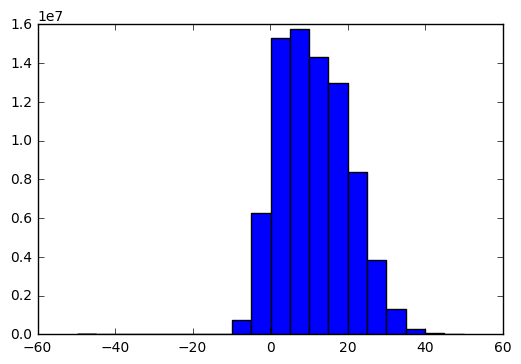

In [9]:
plt.hist(vsechny_teploty, bins=20)

### Co udělá?

* nakreslí graf
* vrátí tuple (bins, counts, list obdélníků), podobně jako numpy

### Odkazy

API dokumentace:

* <http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist>

Příklady:

* <http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html>
* <http://matplotlib.org/examples/statistics/histogram_demo_multihist.html>

## pandas

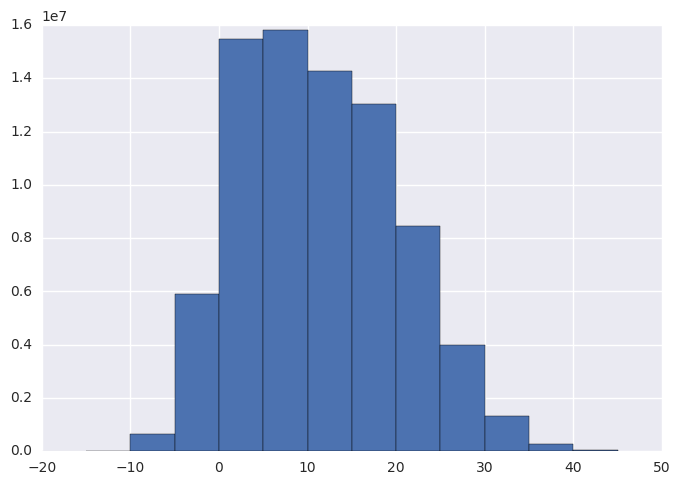

In [15]:
pd.Series(vsechny_teploty).hist(bins=range(-20, 50, 5))

### Co udělá?

* nakreslí graf
* vrátí objekt typu AxesSublot

### Odkazy

API dokumentace:
    
* <http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html>
* <http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html>

## Seaborn (bonus)

In [11]:
import seaborn as sns

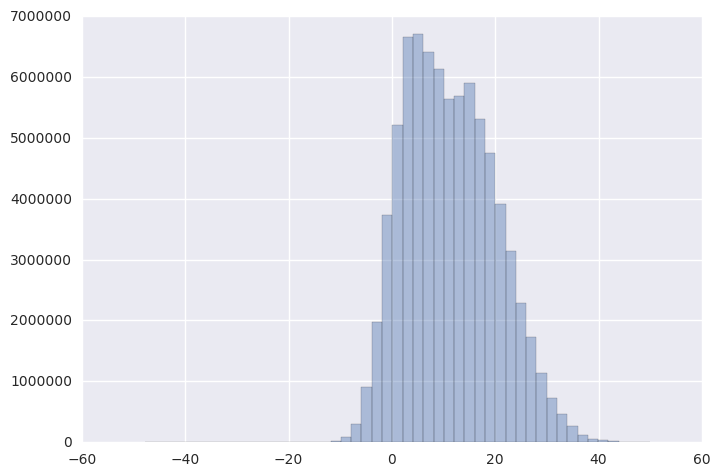

In [12]:
sns.distplot(vsechny_teploty, hist=True, kde=False)

/home/honza/opt/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(-50, 50)

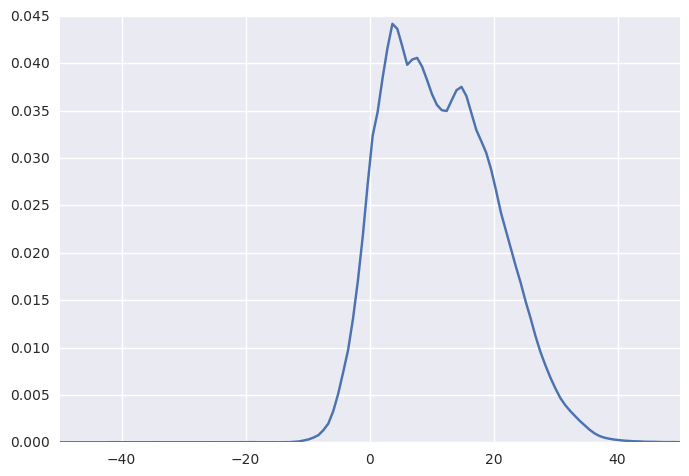

In [13]:
_, ax = plt.subplots()
sns.distplot(vsechny_teploty, hist=False, kde=True, ax=ax)
ax.set_xlim(-50, 50)

### Odkazy

API dokumentace:

* <http://seaborn.pydata.org/generated/seaborn.distplot.html>

Příklady:

* <http://seaborn.pydata.org/examples/distplot_options.html>
